# 第一題

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import thinkdsp as tp
from scipy.signal import chirp, spectrogram
class Trombone(td.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.
        ts: float array of times
        returns: float wave array
        """
        l1, l2=  1.0/self.start, 1.0/self.end
        lengths= np.linspace(l1, l2, len(ts)-1)
        freqs=   1/lengths
        return self._evaluate(ts, freqs)

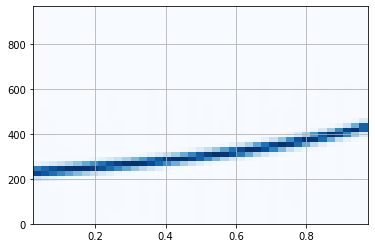

In [8]:
A3=  220 
E3=  330
A4=  440

s1= Trombone(start= A3, end= A4)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)
w1.make_audio()

In [9]:
s2= Trombone(start= A4, end= E3)
w2= s2.make_wave(duration=1)
w2.make_audio()

In [10]:
w3= w1|w2
w3.make_audio()

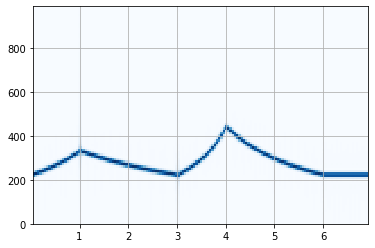

In [11]:
w= (
 Trombone(A3,E3).make_wave(1)
|Trombone(E3,A3).make_wave(2)
|Trombone(A3,A4).make_wave(1)
|Trombone(A4,A3).make_wave(2)
|Trombone(A3,A3).make_wave(1)
)
w.make_spectrogram(1024).plot(high=1000)
w.make_audio()

# 第二題

In [12]:
x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x

In [13]:
x.ts, x.ys
x.ys.shape

(10000,)

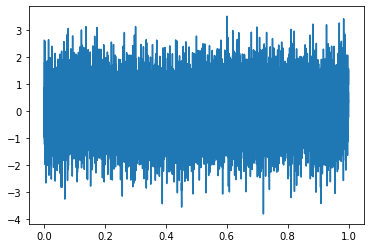

In [14]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)

In [15]:
x.ys.max(), x.ys.mean(), x.ys.std()

(3.516646571740306, -0.0012337870376610816, 0.9946977443522838)

In [16]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

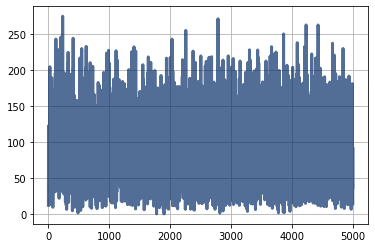

In [17]:
sx.plot()

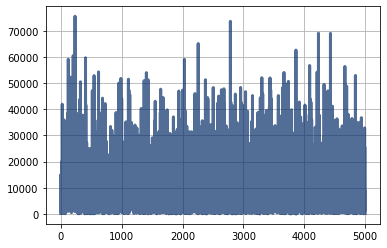

In [18]:
sx.plot_power()

In [19]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

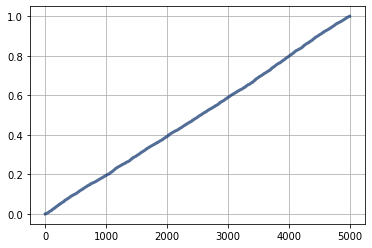

In [20]:
Sx.plot_power()

In [21]:
Sx.estimate_slope()

LinregressResult(slope=1.0205381940991334, intercept=-8.685418168507601, rvalue=0.9987501333704811, pvalue=0.0, stderr=0.0007224127064185402)

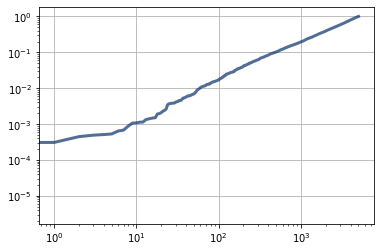

In [22]:

Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [23]:
Sx.estimate_slope()

LinregressResult(slope=1.0205381940991334, intercept=-8.685418168507601, rvalue=0.9987501333704811, pvalue=0.0, stderr=0.0007224127064185402)

In [24]:

y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

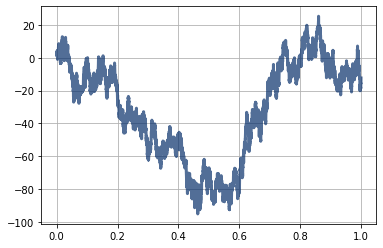

In [25]:
y.plot()

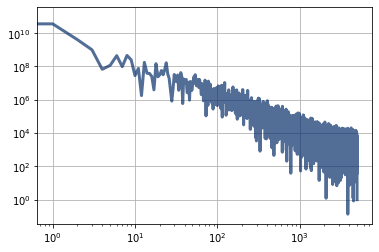

In [26]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

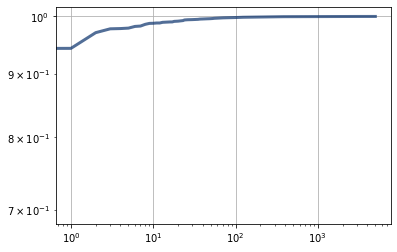

In [27]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

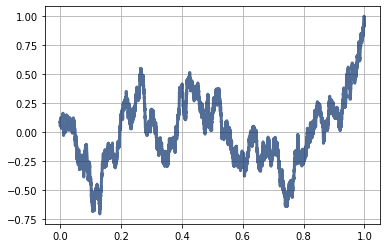

In [28]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [29]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.013493044934266035, intercept=-0.10452052473036641, rvalue=0.24629369188663985, pvalue=5.5370310948472646e-70, stderr=0.0007510516861275716)

# 第三題

In [30]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [31]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


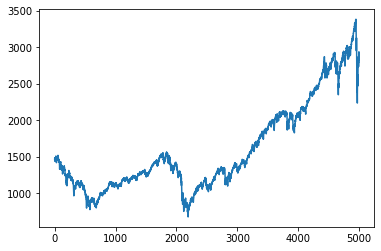

In [32]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [33]:
yWave= td.Wave(ys, framerate= 10000)

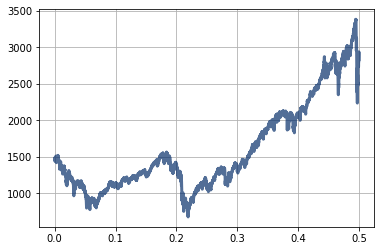

In [34]:
yWave.plot()

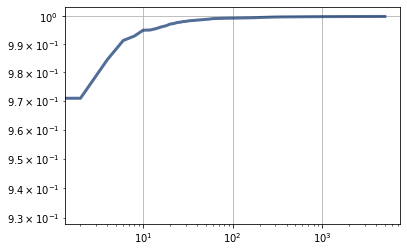

In [35]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')


In [36]:

yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.00032118267557806565, intercept=-0.0025138728815941023, rvalue=0.42786931354255375, pvalue=7.735021238915466e-112, stderr=1.3574898947827898e-05)

# integrated_spectrum 之 log-log slope= .0003 近似於 0，
# 因此 yWave 近似Brownian Noise